In [1]:
import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(100_000_000_000)

from calitp.tables import tbl
from calitp import query_sql
import calitp.magics
import branca

import shared_utils
import utils

from siuba import *
import pandas as pd
import geopandas as gpd
import shapely

import datetime as dt
import time
from zoneinfo import ZoneInfo

import rt_analysis as rt
import importlib

import gcsfs
fs = gcsfs.GCSFileSystem()

from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
E0323 22:14:26.817039037    1443 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0323 22:14:29.135963809    1443 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


In [2]:
importlib.reload(utils)
importlib.reload(rt)

<module 'rt_analysis' from '/home/jovyan/data-analyses/rt_delay/rt_analysis.py'>

In [3]:
bbb_itp_id = 300

In [4]:
analysis_date = dt.date(2022, 2, 8)

In [5]:
pbar = tqdm()

0it [00:00, ?it/s]

In [6]:
bbb = rt.OperatorDayAnalysis(bbb_itp_id, analysis_date, pbar)

found parquet
found parquet
found parquet
found parquet
found_parquet
863240
861367
861866
864403
861814
861363
863331
861362
861359
861888
861868
862775
862703
862234
862088
861811
862243
862478
862710
863073
861380
861358
863034
861822
862082
863245
863317
861014
862701
861854
861780
863247
861366
863244
861880
861044
861813
863249
863318
862072
861364
863226
861812
863516
863174
863202
860967
861843
862405
861817
861816
861887
862242
863518
861385
861365
861361
863315
863298
863319


/opt/conda/lib/python3.9/site-packages/siuba/sql/utils.py:52: SAWarning: Dialect bigquery:bigquery will not make use of SQL compilation caching as it does not set the 'supports_statement_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Dialect maintainers should seek to set this attribute to True after appropriate development and testing for SQLAlchemy 1.4 caching support.   Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)


In [7]:
bbb.rt_trips >> head(3)

,calitp_itp_id,calitp_url_number,service_date,trip_key,trip_id,route_id,direction_id,shape_id,calitp_extracted_at,calitp_deleted_at,route_short_name,median_time,direction,mean_speed_mph
0,300,0,2022-02-08,-3880794432110418766,863274,3369,1,25468,2021-12-06,2022-03-08,R3,07:04:08,Eastbound,13.530882
1,300,0,2022-02-08,-6981635930623604545,863227,3369,0,25467,2021-12-06,2022-03-08,R3,17:03:52,Westbound,13.569099
2,300,0,2022-02-08,8604654890119505412,863271,3369,1,25468,2021-12-06,2022-03-08,R3,12:44:21,Eastbound,7.344299


In [8]:
rt.OperatorDayAnalysis.set_filter(bbb, start_time='15:00', end_time='19:00', route_names=['1', '3', 'R12'])

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1', '3', 'R12'], 'shape_ids': None, 'direction_id': None, 'direction': None}


In [9]:
m = rt.OperatorDayAnalysis.segment_speed_map(bbb)

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1', '3', 'R12'], 'shape_ids': None, 'direction_id': None, 'direction': None}
25404_1_ empty!
25444_1_ empty!
25418_1_ empty!
25419_0_ empty!
25446_0_ empty!
25411_0_ empty!


/home/jovyan/data-analyses/rt_delay/rt_analysis.py:603: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



In [10]:
m

In [11]:
rt.OperatorDayAnalysis.set_filter(bbb, start_time='15:00', end_time='19:00', shape_ids=['25404'], direction_id='0')

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1'], 'shape_ids': ['25404'], 'direction_id': '0', 'direction': 'Northbound'}


In [12]:
# bbb.set_filter(start_time='15:00', end_time='19:00', shape_ids=['25404'], direction_id='0')

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1'], 'shape_ids': ['25404'], 'direction_id': '0', 'direction': 'Northbound'}


Text(0.5, 1.0, 'Big Blue Bus Speed Variability by Stop Segment, Route(s) 1, Northbound, PM Peak, Feb 08 (Tue)')

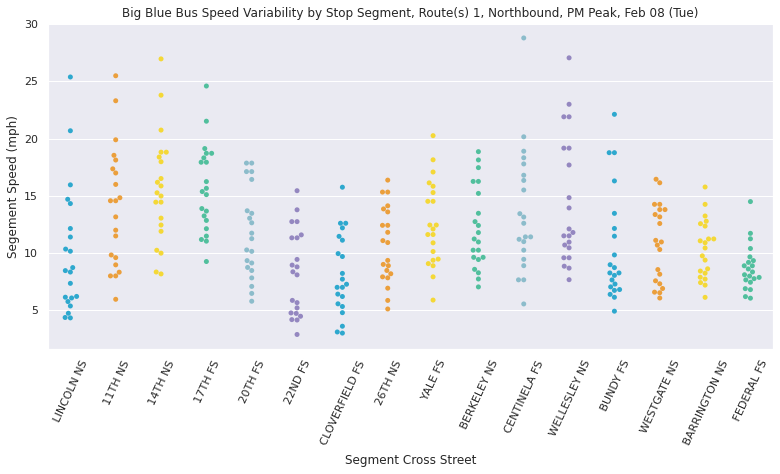

In [13]:
rt.OperatorDayAnalysis.chart_variability(bbb, min_stop_seq = 15, max_stop_seq = 30)

In [14]:
bbb.position_interpolators['860694']['rt'].direction

'Northbound'

In [15]:
bbb._filter(bbb.rt_trips)

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1'], 'shape_ids': ['25404'], 'direction_id': '0', 'direction': 'Northbound'}


,calitp_itp_id,calitp_url_number,service_date,trip_key,trip_id,route_id,direction_id,shape_id,calitp_extracted_at,calitp_deleted_at,route_short_name,median_time,direction,mean_speed_mph
0,300,0,2022-02-08,9189496404936817804,860694,3353,0,25404,2021-12-06,2022-03-08,1,15:46:19.500000,Northbound,6.010434
1,300,0,2022-02-08,-3054465324703039246,860702,3353,0,25404,2021-12-06,2022-03-08,1,17:11:19,Northbound,6.487212
2,300,0,2022-02-08,5817864788633008922,860713,3353,0,25404,2021-12-06,2022-03-08,1,17:46:35,Northbound,7.103820
3,300,0,2022-02-08,972988220055993101,860714,3353,0,25404,2021-12-06,2022-03-08,1,18:01:13,Northbound,6.273718
4,300,0,2022-02-08,-1360799802736523785,860693,3353,0,25404,2021-12-06,2022-03-08,1,15:43:13,Northbound,5.887252
5,300,0,2022-02-08,6273108700257837027,860718,3353,0,25404,2021-12-06,2022-03-08,1,18:59:09,Northbound,8.431785
6,300,0,2022-02-08,5649523177058113349,860715,3353,0,25404,2021-12-06,2022-03-08,1,18:17:57,Northbound,6.492155
7,300,0,2022-02-08,5096104807605464446,860704,3353,0,25404,2021-12-06,2022-03-08,1,17:39:19,Northbound,9.701092
8,300,0,2022-02-08,410095616705037738,860717,3353,0,25404,2021-12-06,2022-03-08,1,18:43:12,Northbound,7.221804
9,300,0,2022-02-08,3507325484027120510,860695,3353,0,25404,2021-12-06,2022-03-08,1,16:01:18,Northbound,6.567387


### Cleaning and Formatting!
   * routes should show display route, not GTFS route
   * inferred direction OK, alternatively headsign endpt...
   * some sort of stop formatting? beyond optionally splitting on &?

In [16]:
tbl.gtfs_schedule.routes() >> filter(_.calitp_itp_id == 300)

,calitp_itp_id,calitp_url_number,route_id,route_type,agency_id,route_short_name,route_long_name,route_desc,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off,calitp_extracted_at,calitp_hash,route_key
0,300,0,3495,3,6216179,R3,Lincoln Blvd/LAX Rapid,None,http://bigbluebus.com/Routes-and-Schedules/Rap...,8FD2CA,000000,None,None,None,2022-03-08,YC/ao3PCxg8i6baHt9tzXQ==,4797842016811721011
1,300,0,3496,3,6216179,R7,Pico Blvd Rapid,None,http://bigbluebus.com/Routes-and-Schedules/Rap...,F5866C,000000,None,None,None,2022-03-08,9ZjkpzELITm3ZA2NvZVULQ==,5918926980151552187
2,300,0,3479,3,6216179,1,Main St & Santa Monica Blvd/UCLA,None,http://bigbluebus.com/Routes-and-Schedules/Rou...,F8971D,000000,None,None,None,2022-03-08,MkAgCP7VPagN9NTsZPF7eg==,3859039626355401893
3,300,0,3480,3,6216179,2,Wilshire Blvd/UCLA,None,http://bigbluebus.com/Routes-and-Schedules/Rou...,552988,FFFFFF,None,None,None,2022-03-08,BZ3GKn8hqhMg58kWkJSIXQ==,-3883221181063417941
4,300,0,3481,3,6216179,3,Lincoln Blvd/LAX,None,http://bigbluebus.com/Routes-and-Schedules/Rou...,D31245,FFFFFF,None,None,None,2022-03-08,matw5f0QQ+Bw+5Eb2vq5Qw==,4567392638189930483


In [17]:
tbl.views.gtfs_schedule_dim_trips()

,calitp_itp_id,calitp_url_number,route_id,trip_id,shape_id,trip_headsign,trip_short_name,direction_id,block_id,wheelchair_accessible,bikes_allowed,calitp_extracted_at,calitp_hash,service_id,trip_key,calitp_deleted_at
0,93,0,D1,D1_T11,D1,Dinuba Rt 1,None,0,None,None,None,2021-11-30,wWIEt8Qfl65dBVl7ZaXf4w==,Monday-Thursday,-7696459957366703923,2021-12-02
1,0,0,3263,845736,25075,UCLA,None,0,None,0,0,2021-04-15,2ffsNqbHCA5NpquzqVduyQ==,20200927_10,-6978136042407056221,2021-04-27
2,247,0,2039,t_216347_b_30823_tn_3,p_4757,SMART Station - Downtown Petaluma,None,1,3056,None,None,2021-08-30,JwB533JPZLRI/YLpdr74zQ==,c_6314_b_30823_d_31,-1276246452414894406,2021-12-29
3,18,0,8,t_1484931_b_30562_tn_0,p_471,Arcata (Westbound),None,0,701/702,None,None,2021-08-03,D8muVnCYwmJYwXNqL+CC4Q==,c_21783_b_30562_d_32,507212817718738684,2021-09-03
4,154,0,19539,t_1482217_b_31069_tn_5,p_1277057,Downtown,None,0,163598,None,None,2021-11-23,JzgqPrDIBzyvbocHyUJtHA==,c_21759_b_31069_d_127,574382576060290596,2022-03-11


In [ ]:
routes_on_date = (tbl.views.gtfs_schedule_fact_daily_feed_routes()
 >> filter(_.date == analysis_date)
 >> filter(_.calitp_extracted_at <= analysis_date, _.calitp_deleted_at >= analysis_date)
)

operator_routes = tbl.views.gtfs_schedule_dim_routes() >> filter(_.calitp_itp_id == 300)

bbb_routes = (routes_on_date
 >> inner_join(_, operator_routes >> select(_.route_id, _.route_key, _.route_short_name),
               on = 'route_key')
 >> select(_.route_id, _.route_short_name)
 >> collect()
)

In [ ]:
bbb.trips >> inner_join(_, bbb_routes, on = 'route_id')

In [ ]:
', ' + ', '.join(['1', 'Northbound', 'PM Peak'])

In [ ]:
', ' + ', '.join([str(x) for x in ['1', None, 'PM Peak'] if x])

In [ ]:
[str(x) for x in ['1', None, 'PM Peak'] if x]